In [62]:
import math
from datetime import datetime
import json
from pymongo import MongoClient
import dbQueries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
sns.set()

In [63]:
plt.style.use('seaborn-notebook')


In [64]:
# Display results per genre
re_json = dbQueries.getTopGenres(10)
df_topGenres = pd.DataFrame.from_dict(re_json)
df_topGenres


,genres,avgRuntime,noMovies,avgPopularity,avgVotes,avgBudget,avgRevenue
0,Drama,96.347,956,19.010,5.588,813482.722,1303498.104
1,Comedy,87.180,685,26.209,5.631,1461973.926,1533509.747
2,Thriller,87.952,504,24.640,5.287,748302.462,962270.169
3,Documentary,177.715,466,6.830,5.276,12958.429,371.322
4,Horror,83.267,460,23.032,4.967,679186.528,1070580.291
5,Romance,89.464,371,16.142,5.657,170811.412,244221.159
6,Action,90.824,262,45.134,5.414,3954561.317,6134759.863
7,TV Movie,76.801,211,7.810,6.261,9479.498,0.000
8,Family,76.649,171,66.763,6.401,6278134.930,5851886.099
9,Crime,94.043,163,17.153,5.455,472388.669,323253.920


In [65]:
df_topGenres.shape

(10, 7)

In [66]:
df_topGenres.describe()

,avgRuntime,noMovies,avgPopularity,avgVotes,avgBudget,avgRevenue
count,10.000000,10.000000,10.000000,10.000000,1.000000e+01,1.000000e+01
mean,96.024200,424.900000,25.272300,5.593700,1.460128e+06,1.742435e+06
std,29.436468,251.030963,18.122465,0.439916,2.049573e+06,2.304731e+06
min,76.649000,163.000000,6.830000,4.967000,9.479498e+03,0.000000e+00
25%,84.245250,223.750000,16.394750,5.318750,2.462057e+05,2.639793e+05
50%,88.708000,415.500000,21.021000,5.521500,7.137445e+05,1.016425e+06
75%,93.238250,494.500000,25.816750,5.650500,1.299851e+06,1.476007e+06
max,177.715000,956.000000,66.763000,6.401000,6.278135e+06,6.134760e+06


In [6]:
# Checking for null values
df_topGenres.isnull().sum()

genres           0
avgRuntime       0
noMovies         0
avgPopularity    0
avgVotes         0
avgBudget        0
avgRevenue       0
dtype: int64

In [7]:
# Checking for duplications
sum(df_topGenres.duplicated())
#df.drop_duplicates(inplace=True)


0

In [8]:
# avgBudget and avgRevenue
# Replace the value of '0' to NaN
df_topGenres[['avgBudget','avgRevenue']] = df_topGenres[['avgBudget','avgRevenue']].replace(0,np.NAN)

df_topGenres.dropna(subset=['avgBudget', 'avgRevenue'], inplace=True)
print('After cleaning, we have {} rows'.format(df_topGenres.shape[0]))

After cleaning, we have 9 rows


In [9]:
# Profits of each movie
df_topGenres['avgProfit'] = df_topGenres['avgRevenue']-df_topGenres['avgBudget']
df_topGenres['avgProfit'] = df_topGenres['avgProfit'].apply(np.int64)
df_topGenres['avgBudget'] = df_topGenres['avgBudget'].apply(np.int64)
df_topGenres['avgRevenue'] = df_topGenres['avgRevenue'].apply(np.int64)
df_topGenres['avgRuntime'] = df_topGenres['avgRuntime'].apply(np.int64)
df_topGenres['avgVotes'] = df_topGenres['avgVotes'].apply(np.int64)

df_topGenres.head()


,genres,avgRuntime,noMovies,avgPopularity,avgVotes,avgBudget,avgRevenue,avgProfit
0,Drama,96,956,19.010,5,813482,1303498,490015
1,Comedy,87,685,26.209,5,1461973,1533509,71535
2,Thriller,87,504,24.640,5,748302,962270,213967
3,Documentary,177,466,6.830,5,12958,371,-12587
4,Horror,83,460,23.032,4,679186,1070580,391393


In [10]:
df_topGenres.dtypes

genres            object
avgRuntime         int64
noMovies           int64
avgPopularity    float64
avgVotes           int64
avgBudget          int64
avgRevenue         int64
avgProfit          int64
dtype: object

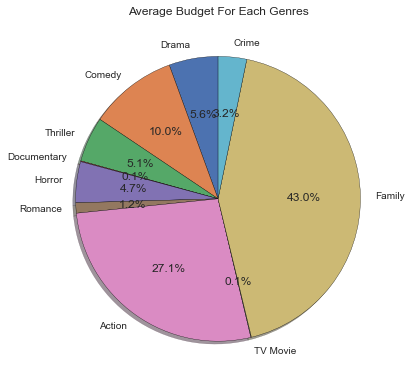

In [75]:
slices = df_topGenres['avgBudget']
labels = df_topGenres['genres']

plt.pie(slices, labels = labels,shadow= True, startangle=90, autopct='%1.1f%%', wedgeprops={'edgecolor':'black'})

plt.title('Average Budget For Each Genres')
plt.tight_layout()
plt.show()

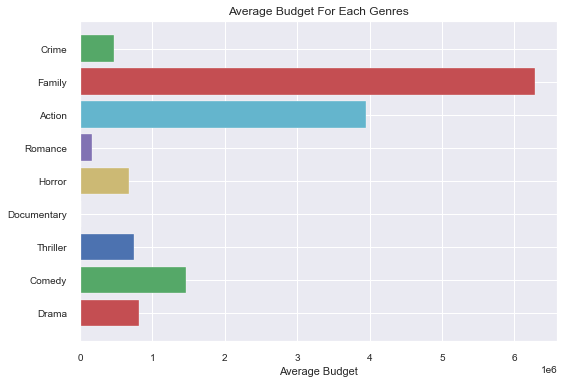

In [49]:
my_colors = 'rgbkymc'
genres = df_topGenres['genres']
avgBudget = df_topGenres['avgBudget']
plt.barh(genres, avgBudget, color= my_colors)

plt.title("Average Budget For Each Genres")
plt.xlabel("Average Budget")    
plt.tight_layout()
plt.show()

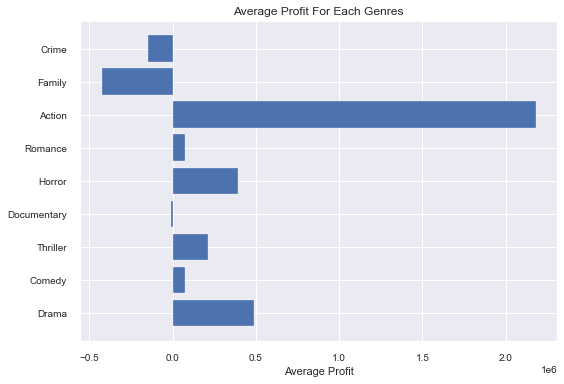

In [11]:

plt.style.use('seaborn-notebook')
genres = df_topGenres['genres']
avgProfit = df_topGenres['avgProfit']
plt.barh(genres, avgProfit)

plt.title("Average Profit For Each Genres")
plt.xlabel("Average Profit")    
plt.tight_layout()
plt.show()

In [78]:
# Display results per production companies
re_json = dbQueries.getTopProductionCompanies(10)
df_topCompanies = pd.DataFrame.from_dict(re_json)
df_topCompanies.head(5)

,production_companies,noMovies,avgPopularity,avgVotesNo,avgBudget,avgRevenue,avgVotes
0,HBO Documentary Films,20,12.498,9.150,0.000000e+00,0.000000e+00,6.090
1,Rai Cinema,17,5.825,83.353,0.000000e+00,0.000000e+00,6.265
2,Amazon Studios,17,43.813,165.412,0.000000e+00,0.000000e+00,6.076
3,Walt Disney Pictures,14,239.847,1125.143,5.314286e+07,1.828517e+07,7.407
4,Ingenious Media,13,47.846,171.538,8.769231e+06,3.091637e+06,6.408


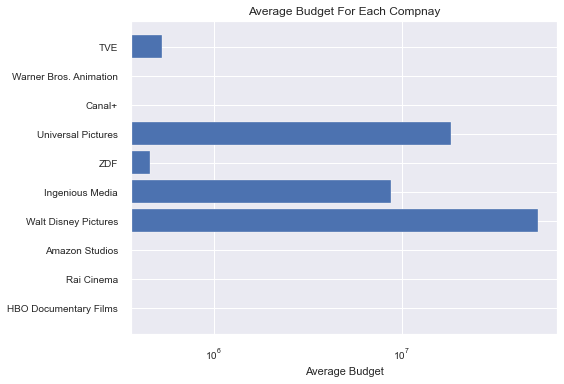

In [ ]:
#plt.style.use('fast')
company = df_topCompanies['production_companies']
avgBudget = df_topCompanies['avgBudget']
plt.barh(company, avgBudget)           #Important changing

plt.xscale('log')
plt.title("Average Budget For Each Compnay")
plt.xlabel("Average Budget")    
plt.tight_layout()
plt.show()

In [13]:
# Display results per vote average
re_json = dbQueries.getTopVoteAvg(10)
df_topVoted = pd.DataFrame.from_dict(re_json)
df_topVoted.head(5)

,title,genres,budget,popularity,production_companies,production_countries,revenue,runtime,status,vote_avg,vote_count
0,Captured,"[Thriller, Horror]",0,3.062,[],[United States of America],0,0,Released,10.0,1
1,The Last Bite,"[Mystery, Science Fiction, Drama]",0,5.157,[],[United Kingdom],0,70,Released,7.0,2
2,Вторжение,[Science Fiction],8819200,51.966,"[Cinema Fund, Art Pictures Studio, Vodorod Fil...",[Russia],32104054,129,Released,6.9,475
3,Dolittle,"[Family, Comedy, Fantasy, Adventure]",175000000,52.025,"[Universal Pictures, Team Downey, Perfect Worl...","[United Kingdom, China, United States of Ameri...",245692007,101,Released,6.8,2399
4,Les vétos,"[Comedy, Drama]",0,5.500,"[Les Films du 24, UGC Distribution]",[France],0,92,Released,6.8,50


In [14]:
# Display results per revenue
re_json = dbQueries.getTopMoreRevenue(10)
df_topMoreRevenue = pd.DataFrame.from_dict(re_json)
df_topMoreRevenue.head(5)

,title,genres,budget,popularity,production_companies,production_countries,revenue,runtime,status,vote_avg,vote_count
0,Dolittle,"[Family, Comedy, Fantasy, Adventure]",175000000,52.025,"[Universal Pictures, Team Downey, Perfect Worl...","[United Kingdom, China, United States of Ameri...",245692007,101,Released,6.8,2399
1,Tolo Tolo,"[Comedy, Drama, Family]",20000000,10.207,"[Taodue Film, Medusa Film]",[Italy],52186426,90,Released,6.2,867
2,Вторжение,[Science Fiction],8819200,51.966,"[Cinema Fund, Art Pictures Studio, Vodorod Fil...",[Russia],32104054,129,Released,6.9,475
3,La Llorona,"[Thriller, Horror]",0,9.617,[],[Mexico],0,0,Released,6.0,2
4,Ghost Stories,[Horror],0,8.424,"[RSVP Movies, Flying Unicorn Entertainment]",[India],0,144,Released,4.7,38


# Analysis On Whole Data Set
## Fetching Data From MongoDB





In [15]:
re_json = dbQueries.wholeData()
wholeData = pd.DataFrame.from_dict(re_json)
wholeData.head()

,title,genres,budget,popularity,production_companies,production_countries,revenue,runtime,status,vote_avg,vote_count,release_date
0,Gabriel's Inferno Part III,"[Romance, Comedy]",0,31.807,[PassionFlix],[United States of America],0,105,Released,9.0,652,2020-11-19
1,Las tres muertes de Marisela Escobedo,"[Documentary, Crime]",0,25.614,[],[Mexico],0,109,Released,9.0,133,2020-10-14
2,블랙핑크: 세상을 밝혀라,"[Documentary, Music]",0,17.153,[RadicalMedia],[South Korea],0,79,Released,8.9,263,2020-10-14
3,Gabriel's Inferno Part II,[Romance],0,8.021,[PassionFlix],[],0,105,Released,8.8,1143,2020-07-31
4,Wolfwalkers,"[Family, Adventure, Animation, Fantasy]",0,39.483,"[Cartoon Saloon, Melusine Productions, Value&P...","[France, Ireland, Luxembourg]",171900,103,Released,8.8,208,2020-10-26


## Number of Rows and Columns Before Data Cleaning





In [16]:
wholeData.shape

(3033, 12)

In [17]:
wholeData.columns

Index(['title', 'genres', 'budget', 'popularity', 'production_companies',
       'production_countries', 'revenue', 'runtime', 'status', 'vote_avg',
       'vote_count', 'release_date'],
      dtype='object')

In [18]:
wholeData.isnull().sum()


title                   0
genres                  0
budget                  0
popularity              0
production_companies    0
production_countries    0
revenue                 0
runtime                 0
status                  0
vote_avg                0
vote_count              0
release_date            0
dtype: int64

# Data Cleaning:

In [19]:

# Changing Data Type of Release Date Into Datetime:

wholeData['release_date'] = pd.to_datetime(wholeData['release_date'])
wholeData['release_date'].head()

0   2020-11-19
1   2020-10-14
2   2020-10-14
3   2020-07-31
4   2020-10-26
Name: release_date, dtype: datetime64[ns]

In [20]:

# Budget and Revenue
# Replacing'0' by NaN

wholeData[['budget','revenue']] = wholeData[['budget','revenue']].replace(0,np.NAN)

wholeData.dropna(subset=['budget', 'revenue'], inplace=True)
print('After cleaning, we have {} rows'.format(wholeData.shape[0]))

After cleaning, we have 54 rows


In [21]:
# Data Imputation
# Profits of each movie

wholeData['profit'] = wholeData['revenue']-wholeData['budget']
wholeData['profit'] = wholeData['profit'].apply(np.int64)
wholeData['budget'] = wholeData['budget'].apply(np.int64)
wholeData['revenue'] = wholeData['revenue'].apply(np.int64)

# Data Analysis

In [22]:
wholeData.dtypes


title                           object
genres                          object
budget                           int64
popularity                     float64
production_companies            object
production_countries            object
revenue                          int64
runtime                          int64
status                          object
vote_avg                       float64
vote_count                       int64
release_date            datetime64[ns]
profit                           int64
dtype: object

In [52]:
wholeData.describe()

,budget,popularity,revenue,runtime,vote_avg,vote_count,profit
count,5.400000e+01,54.000000,5.400000e+01,54.000000,54.000000,54.000000,5.400000e+01
mean,3.201786e+07,132.214852,4.278029e+07,100.481481,6.781481,983.166667,1.076243e+07
std,4.937821e+07,334.948504,8.155866e+07,32.208484,1.244167,1387.996150,6.979590e+07
min,1.000000e+01,1.331000,2.000000e+00,0.000000,0.000000,0.000000,-1.430000e+08
25%,5.000000e+06,9.485500,3.222840e+06,94.000000,6.225000,27.250000,-5.278156e+06
50%,1.300000e+07,32.484500,1.498781e+07,102.000000,6.800000,453.500000,3.124850e+04
75%,3.225000e+07,84.236000,4.232073e+07,110.750000,7.300000,1346.750000,1.379225e+07
max,2.000000e+08,2322.419000,4.609194e+08,165.000000,10.000000,6474.000000,3.809194e+08


In [23]:
wholeData.head()

,title,genres,budget,popularity,production_companies,production_countries,revenue,runtime,status,vote_avg,vote_count,release_date,profit
17,Soul,"[Family, Animation, Comedy, Drama, Music, Fant...",150000000,2322.419,"[Walt Disney Pictures, Pixar]",[United States of America],57400000,102,Released,8.3,4397,2020-12-25,-92600000
22,Underwater,"[Action, Horror, Science Fiction, Thriller]",80000000,464.923,"[Chernin Entertainment, 20th Century Fox, TSG ...",[United States of America],40882928,95,Released,6.3,1877,2020-01-08,-39117072
23,The SpongeBob Movie: Sponge on the Run,"[Animation, Fantasy, Adventure, Comedy, Family]",60000000,463.955,"[United Plankton Pictures, Nickelodeon Movies,...","[South Korea, United States of America]",4700000,95,Released,7.8,1973,2020-08-14,-55300000
25,Mulan,"[Adventure, Fantasy]",200000000,441.304,"[Walt Disney Pictures, China Film Group Corpor...","[China, United States of America]",57000000,115,Released,7.1,4202,2020-09-04,-143000000
27,반도,"[Action, Horror, Thriller]",17000000,403.092,"[Next Entertainment World, RedPeter Film, Vant...",[South Korea],39657073,114,Released,7.0,1187,2020-07-15,22657073


In [24]:

def find_min_max(col_name):
    min_index = wholeData[col_name].idxmin()
    max_index = wholeData[col_name].idxmax()
    #select the lowest and hisghest value from given col_name
    low  = pd.DataFrame(wholeData.loc[min_index,:])
    high = pd.DataFrame(wholeData.loc[max_index,:])
    #Print the results
    
    print('Movie which has highest '+col_name+' : ', wholeData['title'][max_index])
    print('Movie which has lowest '+col_name+' : ', wholeData['title'][min_index])
    return pd.concat([high,low], axis=1)

In [30]:

def top_10(col_name,size=10):
    #find the all times top 10 for a fiven column
    #sort the given column and select the top 10
    df_sorted = pd.DataFrame(wholeData[col_name].sort_values(ascending=False))[:size]
    df_sorted['title'] = wholeData['title']
    plt.figure(figsize=(12,6))
    #Calculate the avarage
    avg = np.mean(wholeData[col_name])   
    sns.barplot(x=col_name, y='title', data=df_sorted, label=col_name)
    plt.axvline(avg, color='k', linestyle='--', label='mean')
    if (col_name == 'profit' or col_name == 'budget' or col_name == 'revenue'):
        plt.xlabel(col_name.capitalize() + ' (U.S Dolar)')
    else:
        plt.xlabel(col_name.capitalize())
    plt.ylabel('')
    plt.title('Top 10 Movies in: ' + col_name.capitalize())
    plt.legend()


In [31]:
find_min_max('profit')


Movie which has highest profit :  八佰
Movie which has lowest profit :  Mulan


,398,25
title,八佰,Mulan
genres,"[War, History, Drama, Action]","[Adventure, Fantasy]"
budget,80000000,200000000
popularity,23.42,441.304
production_companies,"[Beijing Diqi Yinxiang Entertainment, Huayi Br...","[Walt Disney Pictures, China Film Group Corpor..."
production_countries,[China],"[China, United States of America]"
revenue,460919368,57000000
runtime,147,115
status,Released,Released
vote_avg,7.3,7.1


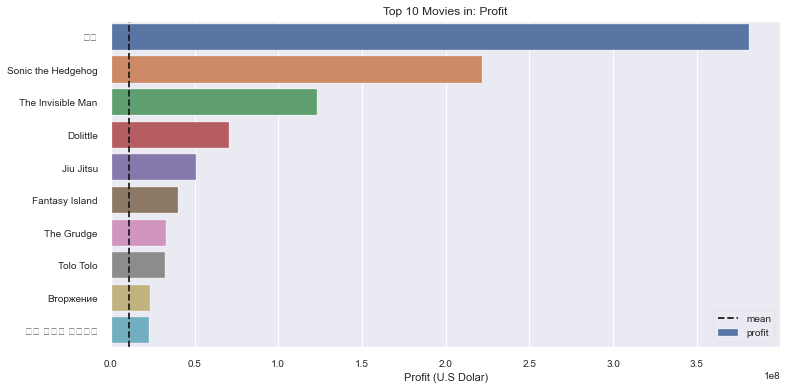

In [32]:
top_10('profit')


In [33]:
find_min_max('budget')


Movie which has highest budget :  Mulan
Movie which has lowest budget :  Don’t Touch My Foot


,25,63
title,Mulan,Don’t Touch My Foot
genres,"[Adventure, Fantasy]","[Comedy, Action]"
budget,200000000,10
popularity,441.304,1.331
production_companies,"[Walt Disney Pictures, China Film Group Corpor...",[Foot News]
production_countries,"[China, United States of America]",[United States of America]
revenue,57000000,2
runtime,115,4
status,Released,Released
vote_avg,7.1,10.0


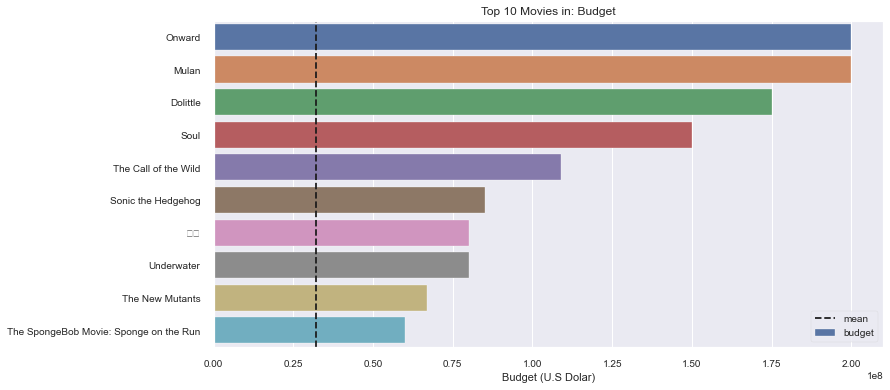

In [34]:
top_10('budget')


In [35]:
find_min_max('revenue')


Movie which has highest revenue :  八佰
Movie which has lowest revenue :  Don’t Touch My Foot


,398,63
title,八佰,Don’t Touch My Foot
genres,"[War, History, Drama, Action]","[Comedy, Action]"
budget,80000000,10
popularity,23.42,1.331
production_companies,"[Beijing Diqi Yinxiang Entertainment, Huayi Br...",[Foot News]
production_countries,[China],[United States of America]
revenue,460919368,2
runtime,147,4
status,Released,Released
vote_avg,7.3,10.0


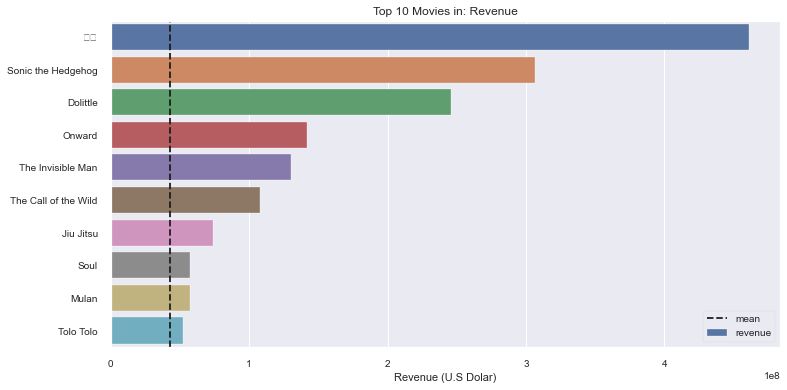

In [36]:
top_10('revenue')


In [37]:
find_min_max('runtime')


Movie which has highest runtime :  అల వైకుంఠపురములో
Movie which has lowest runtime :  From the Depths


,870,863
title,అల వైకుంఠపురములో,From the Depths
genres,"[Action, Drama]","[Drama, Horror, Thriller, Mystery]"
budget,14000000,500
popularity,8.197,8.243
production_companies,"[Geetha Arts, Haarika & Hassine Creations]",[Dual Visions]
production_countries,[India],[]
revenue,28859072,500
runtime,165,0
status,Released,Released
vote_avg,6.4,6.2


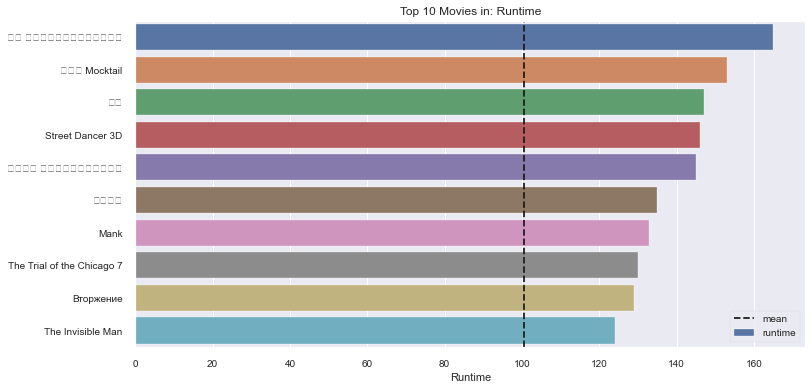

In [38]:
top_10('runtime')


In [39]:

def plot_correlation_map( wholeData ):
    corr = wholeData.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, 
                    annot = True, annot_kws = { 'fontsize' : 12 })

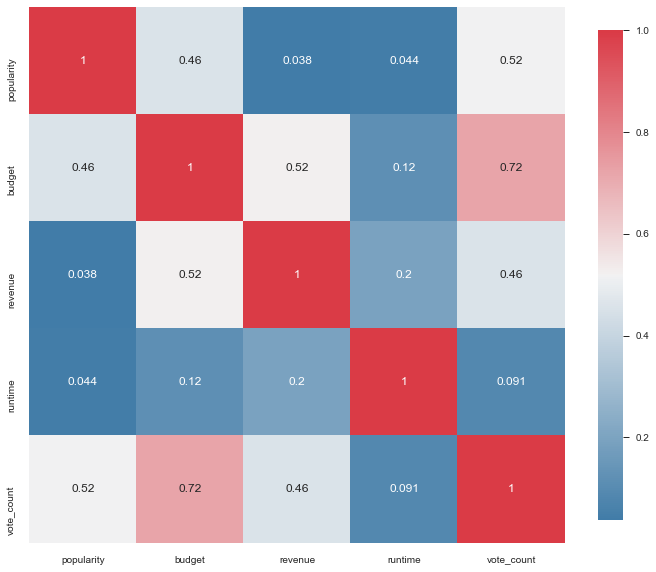

In [ ]:
plot_correlation_map(wholeData[['popularity','budget','revenue','runtime','vote_count']])


Text(0.5, 1.0, 'Total profit by month (1950-2015)')

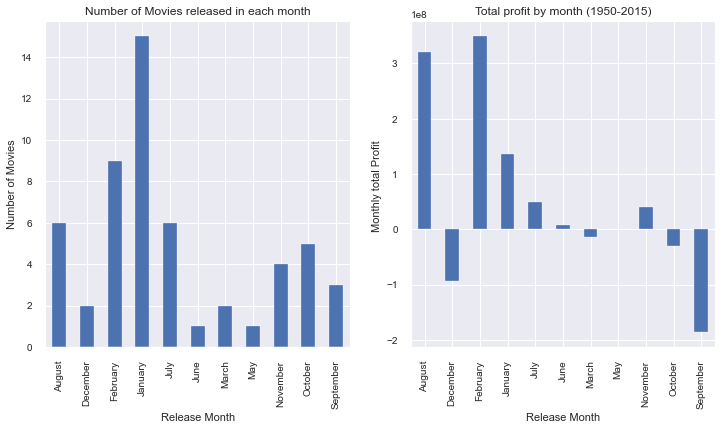

In [48]:
df_month = wholeData.copy()
df_month['release_month'] = df_month['release_date'].dt.strftime("%B")

fig = plt.figure(figsize=(12,6))
count_month = df_month.groupby('release_month')['profit'].count()
plt.subplot(1,2,1)
count_month.plot.bar()
plt.xlabel('Release Month')
plt.ylabel('Number of Movies')
plt.title('Number of Movies released in each month')

plt.subplot(1,2,2)
sum_month = df_month.groupby('release_month')['profit'].sum()

sum_month.plot.bar()
plt.xlabel('Release Month')
plt.ylabel('Monthly total Profit ')
plt.title('Total profit by month (1950-2015)')
#plt.savefig('figure/release_month_.png',bbox_inches='tight')

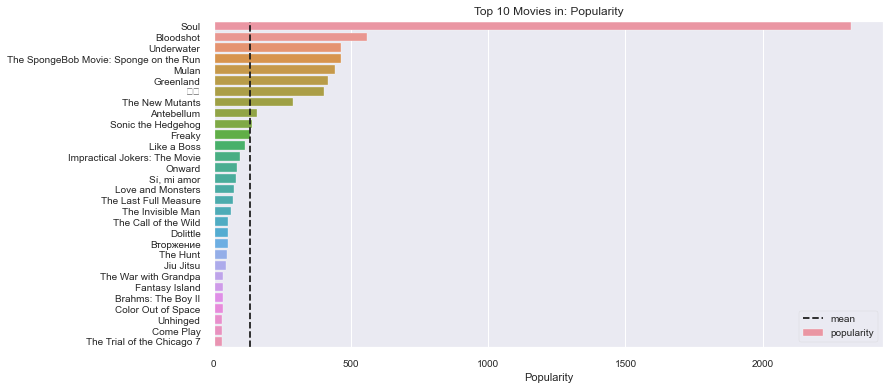

In [45]:
top_10('popularity', size=30)


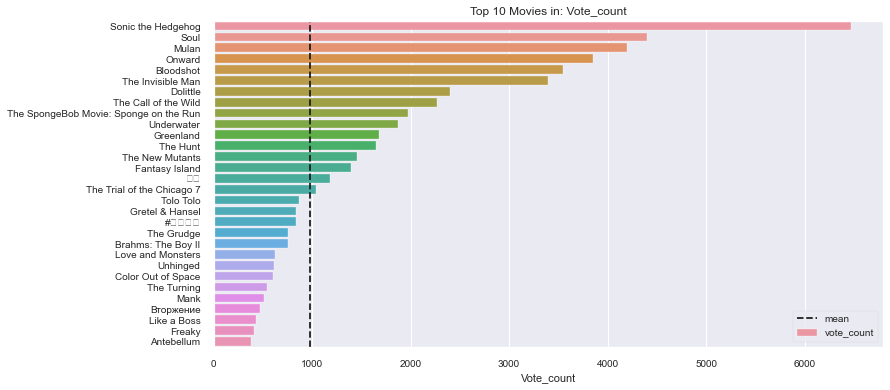

In [40]:
top_10('vote_count', size=30)


In [41]:
df_related = wholeData[['profit','budget','revenue','runtime', 'vote_count','popularity']]


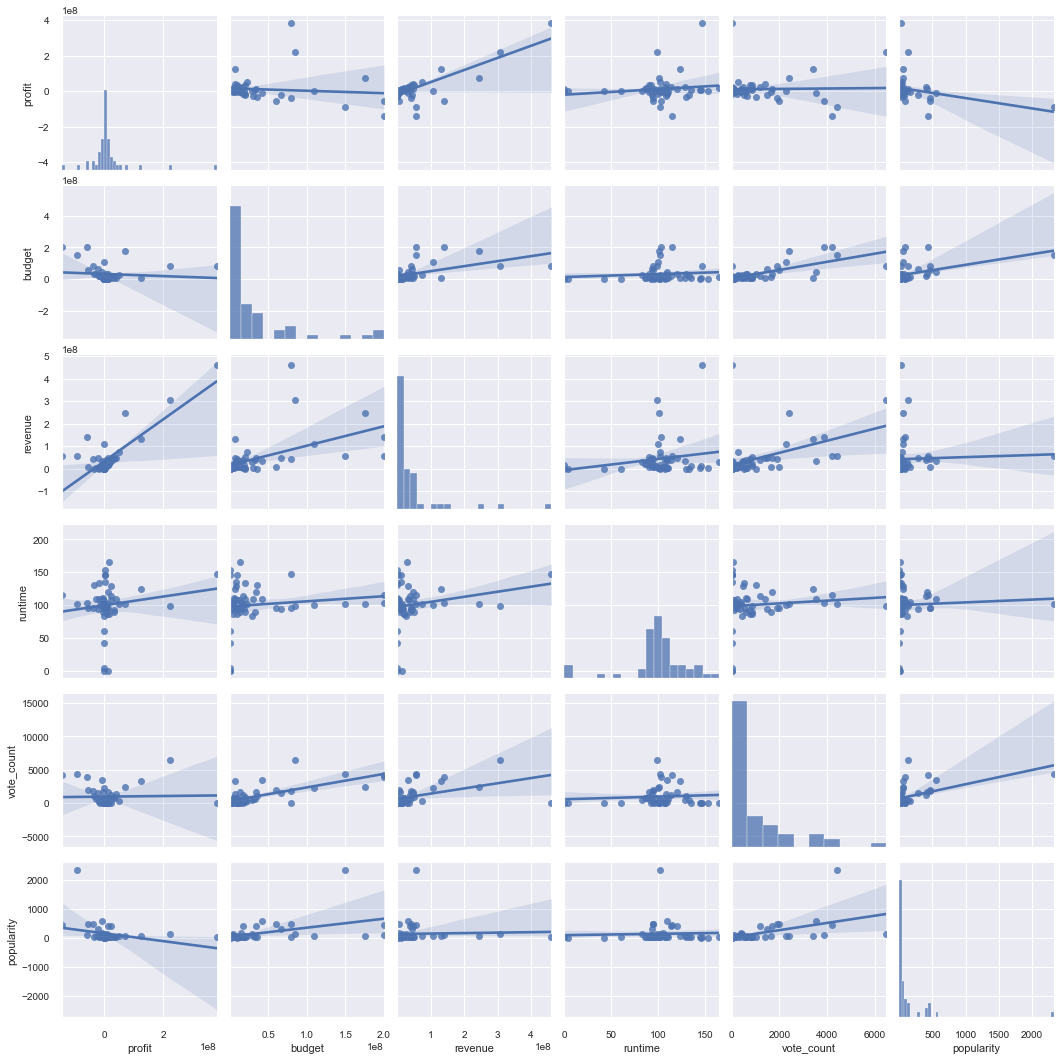

In [42]:
sns.pairplot(df_related, kind='reg')
plt.savefig('correlation.png',bbox_inches='tight')



<AxesSubplot:xlabel='revenue', ylabel='budget'>

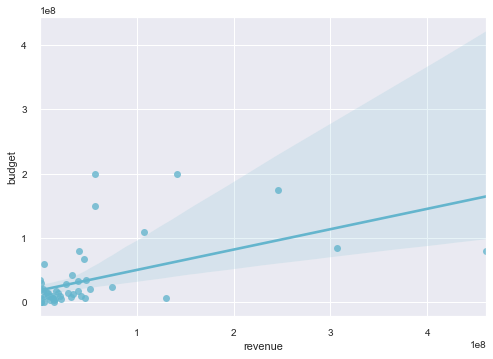

In [44]:
sns.regplot(x=wholeData['revenue'], y=wholeData['budget'],color='c')
